In [1]:
%matplotlib nbagg

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
names = pd.read_csv("data/us-baby-names/NationalNames.csv",sep=",",header=0, names=["id","name","year","sex","births"])

In [10]:
names.head()

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [11]:
names.shape

(1825433, 5)

In [12]:
total_births = names.pivot_table("births",index="year",columns="sex",aggfunc=sum)

In [14]:
total_births.head()

sex,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [15]:
total_births.tail()

sex,F,M
year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


<IPython.core.display.Javascript object>


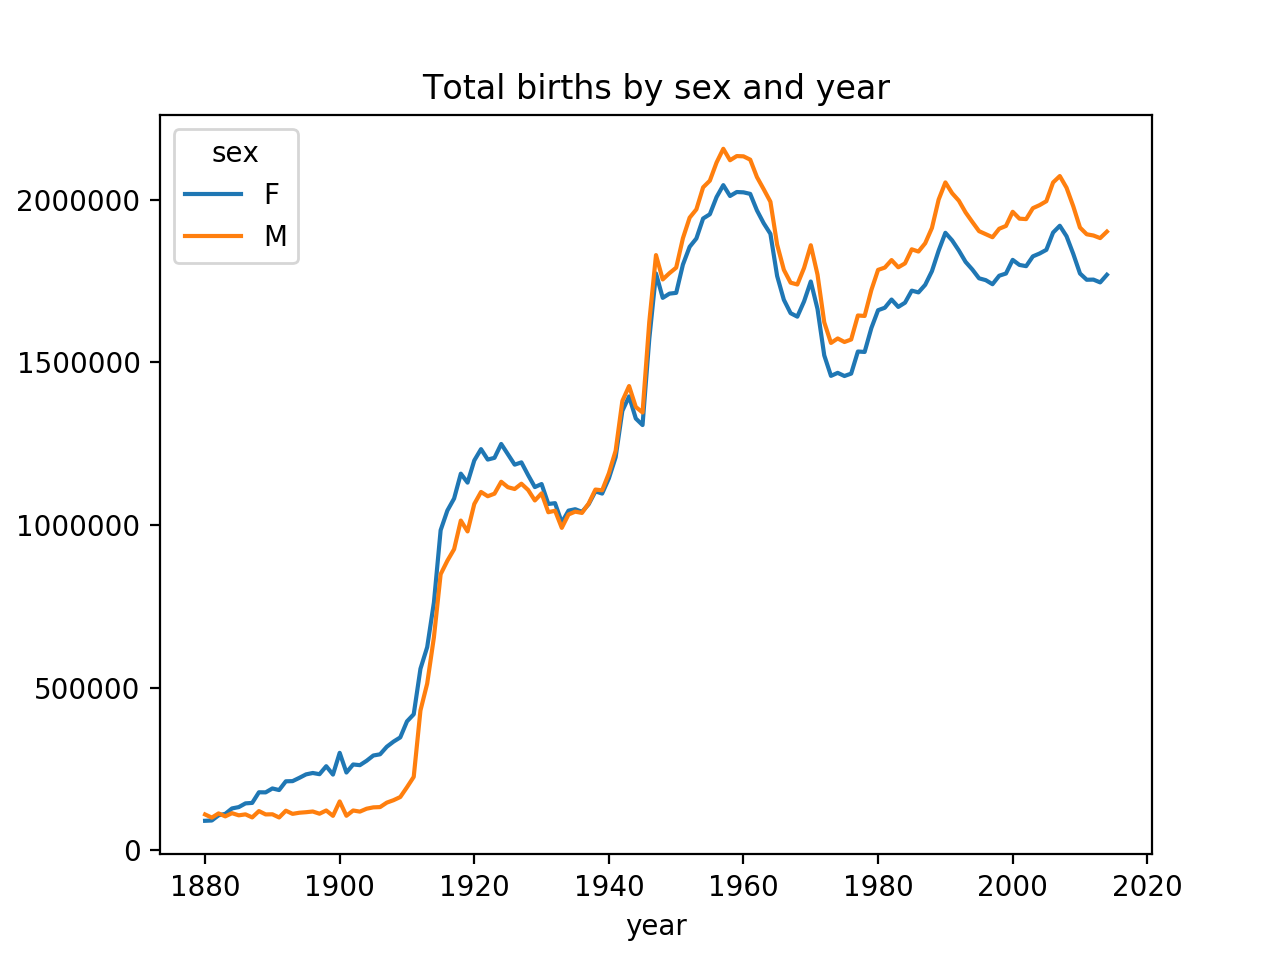

In [16]:
ax = total_births.plot()

In [17]:
ax.set_title("Total births by sex and year")

Text(0.5,1,'Total births by sex and year')

## 각 연도, 성별 그룹 내에서 각 이름의 출생 횟수가 전체에서 차지하는 비중(%)을 나타내는 열 추가하기

In [19]:
grouped_names_dict = dict(list(names.groupby(["year","sex"])))

In [25]:
grouped_names_dict.keys()

dict_keys([(1880, 'F'), (1880, 'M'), (1881, 'F'), (1881, 'M'), (1882, 'F'), (1882, 'M'), (1883, 'F'), (1883, 'M'), (1884, 'F'), (1884, 'M'), (1885, 'F'), (1885, 'M'), (1886, 'F'), (1886, 'M'), (1887, 'F'), (1887, 'M'), (1888, 'F'), (1888, 'M'), (1889, 'F'), (1889, 'M'), (1890, 'F'), (1890, 'M'), (1891, 'F'), (1891, 'M'), (1892, 'F'), (1892, 'M'), (1893, 'F'), (1893, 'M'), (1894, 'F'), (1894, 'M'), (1895, 'F'), (1895, 'M'), (1896, 'F'), (1896, 'M'), (1897, 'F'), (1897, 'M'), (1898, 'F'), (1898, 'M'), (1899, 'F'), (1899, 'M'), (1900, 'F'), (1900, 'M'), (1901, 'F'), (1901, 'M'), (1902, 'F'), (1902, 'M'), (1903, 'F'), (1903, 'M'), (1904, 'F'), (1904, 'M'), (1905, 'F'), (1905, 'M'), (1906, 'F'), (1906, 'M'), (1907, 'F'), (1907, 'M'), (1908, 'F'), (1908, 'M'), (1909, 'F'), (1909, 'M'), (1910, 'F'), (1910, 'M'), (1911, 'F'), (1911, 'M'), (1912, 'F'), (1912, 'M'), (1913, 'F'), (1913, 'M'), (1914, 'F'), (1914, 'M'), (1915, 'F'), (1915, 'M'), (1916, 'F'), (1916, 'M'), (1917, 'F'), (1917, 'M'), (

In [39]:
grouped_sample = grouped_names_dict[(2011,"M")]

In [40]:
grouped_sample.dtypes

id         int64
name      object
year       int64
sex       object
births     int64
dtype: object

In [41]:
grouped_sample.head(10)

,id,name,year,sex,births
1711173,1711174,Jacob,2011,M,20331
1711174,1711175,Mason,2011,M,19488
1711175,1711176,William,2011,M,17314
1711176,1711177,Jayden,2011,M,16954
1711177,1711178,Noah,2011,M,16838
1711178,1711179,Michael,2011,M,16744
1711179,1711180,Ethan,2011,M,16665
1711180,1711181,Alexander,2011,M,15681
1711181,1711182,Aiden,2011,M,15469
1711182,1711183,Daniel,2011,M,15249


In [46]:
def add_prop(agg_df):
    agg_births = agg_df["births"]
    agg_df["prop"] = agg_births / agg_births.sum()
    return agg_df

In [47]:
names_with_prop = names.groupby(["year","sex"]).apply(add_prop)

In [49]:
names_with_prop.head()

,id,name,year,sex,births,prop
0,1,Mary,1880,F,7065,0.077643
1,2,Anna,1880,F,2604,0.028618
2,3,Emma,1880,F,2003,0.022013
3,4,Elizabeth,1880,F,1939,0.021309
4,5,Minnie,1880,F,1746,0.019188


In [50]:
names_with_prop.tail()

,id,name,year,sex,births,prop
1825428,1825429,Zykeem,2014,M,5,0.000003
1825429,1825430,Zymeer,2014,M,5,0.000003
1825430,1825431,Zymiere,2014,M,5,0.000003
1825431,1825432,Zyran,2014,M,5,0.000003
1825432,1825433,Zyrin,2014,M,5,0.000003


### 각 연도,성별 그룹내 출생횟수 기준 TOP1000 이름 추출하기

In [53]:
grouped_names_with_prop_dict = dict(list(names_with_prop.groupby(["year","sex"])))

In [55]:
grouped_names_with_prop_dict

{(1880, 'F'):       id       name  year sex  births      prop
 0      1       Mary  1880   F    7065  0.077643
 1      2       Anna  1880   F    2604  0.028618
 2      3       Emma  1880   F    2003  0.022013
 3      4  Elizabeth  1880   F    1939  0.021309
 4      5     Minnie  1880   F    1746  0.019188
 5      6   Margaret  1880   F    1578  0.017342
 6      7        Ida  1880   F    1472  0.016177
 7      8      Alice  1880   F    1414  0.015540
 8      9     Bertha  1880   F    1320  0.014507
 9     10      Sarah  1880   F    1288  0.014155
 10    11      Annie  1880   F    1258  0.013825
 11    12      Clara  1880   F    1226  0.013474
 12    13       Ella  1880   F    1156  0.012704
 13    14   Florence  1880   F    1063  0.011682
 14    15       Cora  1880   F    1045  0.011484
 15    16     Martha  1880   F    1040  0.011429
 16    17      Laura  1880   F    1012  0.011122
 17    18     Nellie  1880   F     995  0.010935
 18    19      Grace  1880   F     982  0.010792
 19    

In [56]:
grouped_sample = grouped_names_with_prop_dict[(2011,"M")]

In [58]:
grouped_sample.head(10)

,id,name,year,sex,births,prop
1711173,1711174,Jacob,2011,M,20331,0.010739
1711174,1711175,Mason,2011,M,19488,0.010294
1711175,1711176,William,2011,M,17314,0.009145
1711176,1711177,Jayden,2011,M,16954,0.008955
1711177,1711178,Noah,2011,M,16838,0.008894
1711178,1711179,Michael,2011,M,16744,0.008844
1711179,1711180,Ethan,2011,M,16665,0.008802
1711180,1711181,Alexander,2011,M,15681,0.008283
1711181,1711182,Aiden,2011,M,15469,0.008171
1711182,1711183,Daniel,2011,M,15249,0.008054


In [62]:
grouped_sample.sort_values(by="births",ascending=False).iloc[:10]

,id,name,year,sex,births,prop
1711173,1711174,Jacob,2011,M,20331,0.010739
1711174,1711175,Mason,2011,M,19488,0.010294
1711175,1711176,William,2011,M,17314,0.009145
1711176,1711177,Jayden,2011,M,16954,0.008955
1711177,1711178,Noah,2011,M,16838,0.008894
1711178,1711179,Michael,2011,M,16744,0.008844
1711179,1711180,Ethan,2011,M,16665,0.008802
1711180,1711181,Alexander,2011,M,15681,0.008283
1711181,1711182,Aiden,2011,M,15469,0.008171
1711182,1711183,Daniel,2011,M,15249,0.008054


In [63]:
def get_top1000(agg_df):
    top1000_df = agg_df.sort_values(by="births",ascending=False).iloc[:1000]
    return top1000_df

In [65]:
top1000_names = names_with_prop.groupby(["year","sex"]).apply(get_top1000)

In [68]:
top1000_names.head(10)

id       name  year sex  births      prop
year sex                                             
1880 F   0   1       Mary  1880   F    7065  0.077643
         1   2       Anna  1880   F    2604  0.028618
         2   3       Emma  1880   F    2003  0.022013
         3   4  Elizabeth  1880   F    1939  0.021309
         4   5     Minnie  1880   F    1746  0.019188
         5   6   Margaret  1880   F    1578  0.017342
         6   7        Ida  1880   F    1472  0.016177
         7   8      Alice  1880   F    1414  0.015540
         8   9     Bertha  1880   F    1320  0.014507
         9  10      Sarah  1880   F    1288  0.014155

In [69]:
names_with_prop.loc[(names_with_prop["year"]==2011)&\
                    (names_with_prop["sex"]=="M")].shape

(14329, 6)

In [71]:
top1000_names.loc[(2011,"M")].shape

(1000, 6)

In [72]:
top1000_names.loc[(2012,"M")].shape

(1000, 6)